# Support Vector Machines - Exercise 1

In this exercise, we'll be using support vector machines (SVMs) to build a spam classifier.  We'll start with SVMs on some simple 2D data sets to see how they work.  Then we'll do some pre-processing work on a set of raw emails and build a classifier on the processed emails using a SVM to determine if they are spam or not.

In [4]:
'''
Que es SVM (maquina de vectores de soporte)?
KNN tomaba decisiones 'mirando a los vecinos' mas cercanos
SVM tiene una logica diferente. Es un algoritmo de clasificacion que busca encontrar
el 'hiperplano' (en nuestro caso, una linea, ya que tenemos 2d) que mejor separa las clases.
    -HIPERPLANO: es la linea de decision
    -MARGEN: Es la 'calle' o el espacio entre las clases. El objetivo de SVM es hacer esta calle 
    lo mas ancha posible.
    -VECTORES DE SOPORTE: Son los puntos de datos (reviews) que estan justo al borde del margen.
    Son los unicos puntos que importan para definir a la frontera; si mueves caulquier otro pto,
    la linea no cambia
Para datos que no se pueden separa con una linea recta (lo mas comun), SVM utiliza el 'truco del kernel'
proyecta los datos a una dimension superior donde si se puedan separar. Los kernels mas comunes son:
    -linear: para datos separables en una linea
    -rbf: (radial basic function) es el mas popular, excelente para crear fronteras complejas 
    y no lineales
    -poly: Polinomico
'''




"\nQue es SVM (maquina de vectores de soporte)?\nKNN tomaba decisiones 'mirando a los vecinos' mas cercanos\nSVM tiene una logica diferente. Es un algoritmo de clasificacion que busca encontrar\nel 'hiperplano' (en nuestro caso, una linea, ya que tenemos 2d) que mejor separa las clases.\n    -HIPERPLANO: es la linea de decision\n    -MARGEN: Es la 'calle' o el espacio entre las clases. El objetivo de SVM es hacer esta calle \n    lo mas ancha posible.\n    -VECTORES DE SOPORTE: Son los puntos de datos (reviews) que estan justo al borde del margen.\n    Son los unicos puntos que importan para definir a la frontera; si mueves caulquier otro pto,\n    la linea no cambia\nPara datos que no se pueden separa con una linea recta (lo mas comun), SVM utiliza el 'truco del kernel'\nproyecta los datos a una dimension superior donde si se puedan separar. Los kernels mas comunes son:\n    -linear: para datos separables en una linea\n    -rbf: (radial basic function) es el mas popular, excelente par

The first thing we're going to do is look at a simple 2-dimensional data set and see how a linear SVM works on the data set for varying values of C (similar to the regularization term in linear/logistic regression).  Let's load the data.
## Exercise 1
#### 1. Load libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
# --- Preprocesado ---
# Para dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
# Para escalar los datos (¡CRUCIAL para SVM!)
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# --- Modelo ---
# El clasificador de Máquina de Vectores de Soporte
from sklearn.svm import LinearSVC, SVC

# --- Métricas de Evaluación ---
# Para ver qué tan bueno es nuestro modelo
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import multilabel_confusion_matrix

# --- (EXTRA) Herramientas para Pipeline y Búsqueda de Hiperparámetros ---
from sklearn.model_selection import GridSearchCV


#### 2. Load data
Load the file *ejer_1_data1.mat*. Find the way for loading this kind of file. **scipy.io.loadmat**

In [6]:
''' 
usamos la funcion sio.loadmat para leer el archivo. Los datos se cargan en 
estructura tipo diccionario. 
'''
import scipy.io as sio
mat = sio.loadmat(r'C:\Users\joseb\Documents\the_bridge\ONLINE_DS_THEBRIDGE_jbenegasb\modulo_1\2509_dsft_thebridge\3-Machine Learning\1-Supervisado\3-RegorClass\8-SVM\ejercicios\data\ejer_1_data1.mat')

In [7]:
mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [8]:
mat['y']

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1]], dtype=uint8)

#### 3. Create a DataFrame with the features and target

In [9]:
'''
Para facilitar la manipulacion y visualizacion, convertimos los arrays de np
( mat['X'] y mat['y']) en un DF de pandas
- X = mat['x'] extrae las caracteristicas
- y = mat['y'].ravel() extrae la variable objetivo y .ravel() la "aplana"
(convierte de [[0], [1], [0]] a [ 0 , 1, 0]) para que PD las entienda como 
una sola columna 
'''

X = mat['X']
y = mat['y'].ravel()

df = pd.DataFrame(data = X, columns=['x1', 'x2'])
df['y'] = y 
df.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [10]:
# crea df

In [11]:
df.describe()

,x1,x2,y
count,51.000000,51.000000,51.000000
mean,2.268780,3.132512,0.411765
std,0.928531,0.753256,0.497050
min,0.086405,1.617700,0.000000
25%,1.572550,2.636000,0.000000
50%,2.275300,3.070900,0.000000
75%,2.955050,3.531400,1.000000
max,4.015000,4.616200,1.000000


In [12]:
df['y'].value_counts(normalize= True)

y
0    0.588235
1    0.411765
Name: proportion, dtype: float64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      51 non-null     float64
 1   x2      51 non-null     float64
 2   y       51 non-null     uint8  
dtypes: float64(2), uint8(1)
memory usage: 995.0 bytes


In [14]:
# info del df


In [15]:
# describe del df

In [16]:
# value counts de las clases normalizado

#### 4. Plot a scatterplot with the data

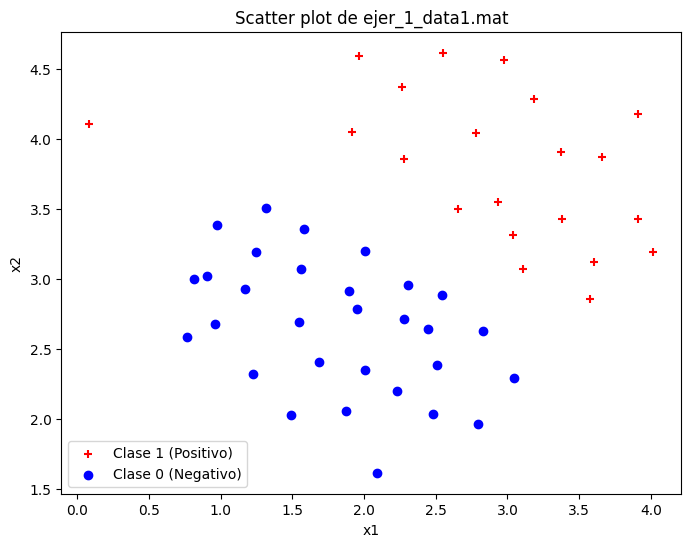

In [17]:
'''
-Separamos los datos en positive (clase 1) y negative (clase 0)
-Usamos plt.scatter para cada grupo, y dandoles colores y marcadores distintos 
-Como puedes ver en el gráfico, los datos son linealmente separables,
 aunque hay un punto positivo (rojo) que está muy cerca 
 de la frontera de los negativos (azul).
'''
positive = df[df['y'] == 1]
negative = df[df['y'] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(positive['x1'], positive['x2'], c='r', marker='+', label='Clase 1 (Positivo)')
plt.scatter(negative['x1'], negative['x2'], c='b', marker='o', label='Clase 0 (Negativo)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='lower left')
plt.title('Scatter plot de ejer_1_data1.mat')
plt.show()


In [18]:


# pinta un scatter con los puntos y el color según la y
# pon la leyenda abajo a la izquierda

Notice that there is one outlier positive example that sits apart from the others.  The classes are still linearly separable but it's a very tight fit.  We're going to train a linear support vector machine to learn the class boundary.

#### 5. LinearSVC
Declare a Linear SVC with the hyperparamenters:

```Python
LinearSVC(C=1, loss='hinge', max_iter=10000)
```

In [19]:
'''
Implementamos el primer modelo.
LinaerSVC es una implementacion de SVM optimizada para modelos lineales

-C=1: este es el parametro de regularizacion. Un valor de C chico crea 
una margen suave ( que permite que los puntos esten mal clasificados para
encontrar una frontera mas general). Un valor de C grande crea un margen duro
(intenta clasificar todo correctamente, penalizando los errrores)

-loss='hinge': Es la funcion de perdida clasica de SVM

-max_iter = 10000: aumentamos las iteraciones para asegurarnos que el modelo 
converja
'''

svc_1 = LinearSVC(C=1, loss='hinge', max_iter=10000)

#### 6. Try the performance (score)
For the first experiment we'll use C=1 and see how it performs.

In [20]:
'''
-SVC_fit(X, y): entrena el modelo usando nuestras caracteristicas X y etiquetas y
-svc_1.score(X, y): Calcula la presicion (accuracy) del modelo sobre estos mismos datos
'''

svc_1.fit(X, y)
svc_1.score(X, y)

0.9803921568627451

In [ ]:
# no hace falta separar en train y en test por simplicidad
# entrena el modelo con X, y
# calcula el score por defecto del modelo



0.9803921568627451

It appears that it mis-classified the outlier.

#### 7. Increase the value of C until you get a perfect classifier

In [31]:
# Importamos el SVC "general"
from sklearn.svm import SVC

# Creamos un modelo con kernel lineal y C=100
# Nota: No es 'LinearSVC', es 'SVC'
svc_kernel_test = SVC(C=100, kernel='linear')

# Entrenamos
svc_kernel_test.fit(X, y)

# Imprimimos el score
print(f"Score con SVC(kernel='linear', C=100): {svc_kernel_test.score(X, y)}")

Score con SVC(kernel='linear', C=100): 1.0


In [29]:
'''
El score de 0.98 nos dice que fallo en algun punto (seguramente el outlier rojo).
Al aumentar C a 100, forzamos al modelo a ser mas estricto y a no tolerar errores. Esto logra un score 
perfecto (1.0) en los datos de entrenamiento, pero a costa de crear una frontera menos "natural" (posible overfitting)
'''

svc_100 = LinearSVC(C=100, loss='hinge', max_iter=1000000)
svc_100.fit(X, y)
print(svc_100.score(X, y))

0.9803921568627451


In [ ]:
'''
LinearSVC vs SVC(kernel='linear')
1-LinearSVC usa una libreria llamada liblinear.
 Esta hiperoptimizada para ser rapida con datos de muchas dimensiones (como texto). Como parte de esa optimizacion
 es un poco mas relajada con su definicion de coste. En este caso, decidio que el coste de mover la frontera para 
 salvar ese outlier era demasiado alto, asi que prefirio pagar la multa( incluso con C=100 ) y dejarlo mal clasificado
2- SVC(kernel = 'linear') usa la libreria libsvm. Esta es la implementacion "clasica" y mas teoricamente pura de SVM.
Esta pensada para ser mas precisa. Cuando hice C=100, se lo tomo al pie de la letra y entendio: "no toleres ningun error,
cueste lo que cueste" entonces fuerza la frontera hasta lograr un 1.0 
'''

In [ ]:
# equivalente a lo anterior pero subiendo el hiperparámetro C

1.0

This time we got a perfect classification of the training data, however by increasing the value of C we've created a decision boundary that is no longer a natural fit for the data.  We can visualize this by looking at the confidence level for each class prediction, which is a function of the point's distance from the hyperplane.

#### 8. Plot Decission Function
Get the `decision_function()` output for the first model. Plot a scatterplot with X1, X2 and a range of colors based on `decision_function()`

In [33]:
'''
la decision_function() nos da la distancia frimada de cada punto a la linea (hiperplano) que separa las clases.
- Un score > 0 signica que se clasifica como clase 1
- Un score < 0 significa que se clasifica como clase 0
- Un score cercano a 0 esta muy cerca de la frontera. Al usar estos scores como la paleta de color ( c=... ),
podemos ver visualmente esta 'confianza'. Con C=1, la frontera es mas suave .
'''

decision_score_1 = svc_1.decision_function(X)
decision_score_1

array([ 0.80270285,  0.38380085,  1.37735409,  0.52106146,  0.33331269,
        0.86859651,  0.6864154 ,  1.61107732,  0.83436191,  1.16699783,
        1.07311884,  0.22971197,  0.33171131,  0.79568289,  0.31569339,
        1.2739616 ,  1.21007212,  0.99986492,  0.56464686,  0.38979305,
       -0.43531868, -0.30888939, -0.68628755, -0.55404608, -0.33254195,
       -0.29386293, -0.44071443, -0.98399127, -0.68564466, -1.32848518,
       -1.00380598, -1.49232673, -0.61145399, -0.68348556, -1.00006725,
       -1.15276187, -1.57842091, -1.35601635, -1.03243754, -1.18508666,
       -0.77146671, -0.76697233, -0.46655764, -1.        , -0.51035601,
       -0.85863417, -1.5590182 , -0.25492098, -1.11369259, -1.54722499,
       -0.71003151])

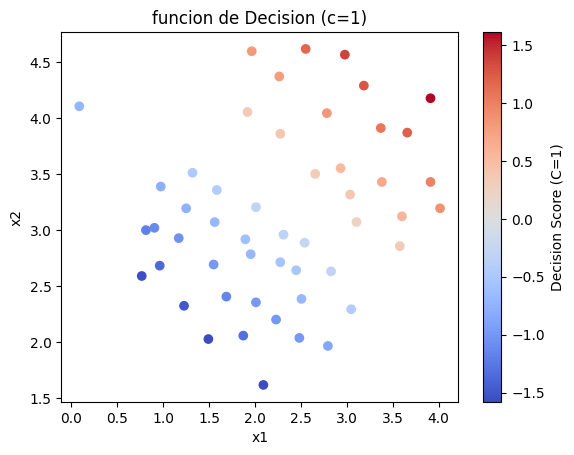

In [34]:
plt.scatter (df['x1'], df['x2'], c = decision_score_1, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label = 'Decision Score (C=1)')
plt.title('funcion de Decision (c=1)')
plt.show()

In [ ]:
# obtén la función de decisión del modelo

array([ 0.80326804,  0.38418881,  1.37789741,  0.52136793,  0.33344668,
        0.86880332,  0.68668657,  1.61151592,  0.8347857 ,  1.1675593 ,
        1.07350294,  0.22990319,  0.33215004,  0.79619096,  0.3159919 ,
        1.27443713,  1.21044245,  1.00012841,  0.56484289,  0.39004284,
       -0.43503823, -0.30865113, -0.68614681, -0.5539268 , -0.33236558,
       -0.29377084, -0.4407047 , -0.98403332, -0.68560547, -1.3285136 ,
       -1.0037668 , -1.49228339, -0.61128121, -0.68327196, -0.99994223,
       -1.15270604, -1.57845099, -1.35588523, -1.03225185, -1.184879  ,
       -0.77117024, -0.76672544, -0.46623739, -1.        , -0.51025602,
       -0.85869754, -1.55915293, -0.25476475, -1.11348144, -1.54711262,
       -0.70955424])

<Axes: xlabel='x1', ylabel='x2'>

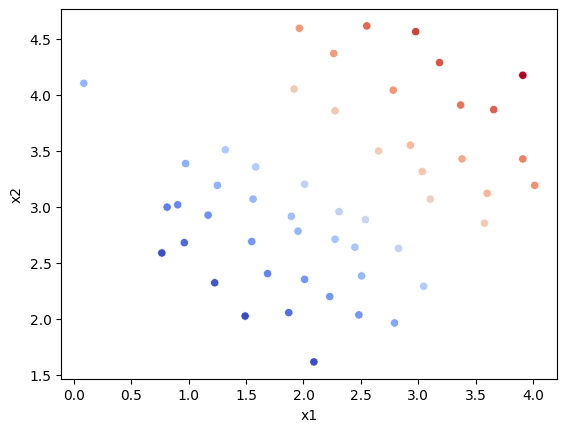

In [ ]:


# usa un scatter para pintar los puntos, usa en el parámetro c del scatterplot la función de decisión
# el color puede ser "coolwarm"

#### 9. Do the same with the second model

In [35]:
decision_scores_100 = svc_kernel_test.decision_function(X)
decision_scores_100

array([ 16.2205912 ,   8.03223703,  20.56616443,   7.08812235,
         0.99968557,   7.46955389,   7.58460717,  19.84315158,
        12.81636773,  19.23930925,  13.82632428,   1.60106391,
         8.9063683 ,  14.67626823,   5.1248155 ,  17.92049527,
        14.63970774,  10.0653369 ,   4.59046124,   4.49233934,
        -1.76666676,  -1.78194774,  -7.54393316,  -6.9708837 ,
        -3.59282722,  -5.45272771,  -8.84909221, -14.84054996,
       -10.17774882, -17.43205253, -12.89881255, -16.96814984,
        -6.07138288,  -5.62624419, -10.63574501, -13.73972746,
       -19.61249789, -13.52095073,  -9.3357072 , -10.0702686 ,
        -4.224657  ,  -5.47480866,  -0.99934499, -13.88456961,
        -7.0986556 , -14.32264675, -22.16662635,  -3.4527215 ,
        -9.36899126, -15.64336137,   0.99968063])

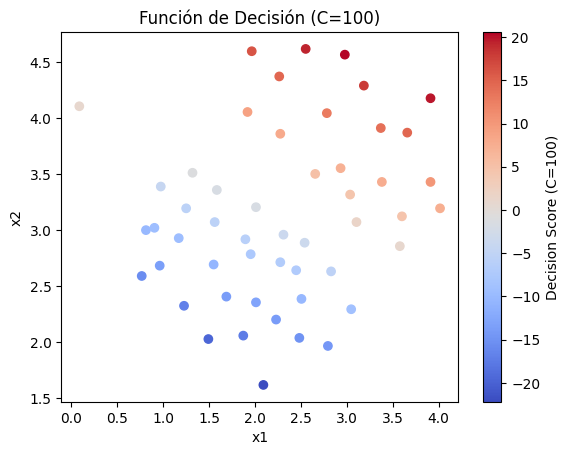

In [36]:
plt.scatter(df['x1'], df['x2'], c=decision_scores_100, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Decision Score (C=100)')
plt.title('Función de Decisión (C=100)')
plt.show()

In [ ]:
'''
Observamos en el grafico como los modelos son mucho mas intenso y la transicion es mas abrupta. 
El modelo esta 'forzando' la frontera para clasificar correctamente el outlier, creando un margen muy estrecho 

'''

array([ 12.00369109,   6.08408803,  15.14525606,   5.40157108,
         1.00006795,   5.67733945,   5.76050326,  14.62258543,
         9.5426901 ,  14.18602447,  10.27282906,   1.43481383,
         6.71601736,  10.88725885,   3.9822321 ,  13.23262567,
        10.86085387,   7.55390756,   3.59594868,   3.52500297,
        -0.99984855,  -1.01088777,  -5.17640231,  -4.76212158,
        -2.32002177,  -3.66459051,  -6.11992106, -10.45133743,
        -7.08045708, -12.32482425,  -9.04760546, -11.98946687,
        -4.11185225,  -3.79005419,  -7.41157401,  -9.65553422,
       -13.90114114,  -9.49738729,  -6.47174438,  -7.00278762,
        -2.77681527,  -3.6805826 ,  -0.44513333,  -9.760235  ,
        -4.85448856, -10.07692381, -15.74758678,  -2.21873086,
        -6.49581132, -11.03174573,   1.        ])

<Axes: xlabel='x1', ylabel='x2'>

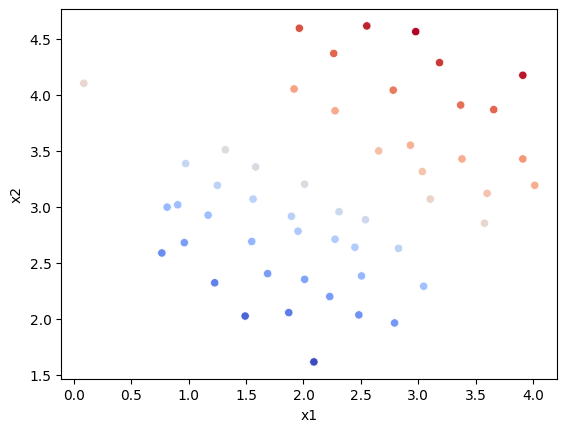

In [ ]:
# equivalente con el segundo modelo

y = ax1 + bx2 + c

0 = ax1 + bx2 + c

x2 = -ax1/b - c/b

In [ ]:
# coeficientes del segundo modelo

array([[3.38442027, 9.46275484]])

In [ ]:
# intercept del segundo modelo

array([-38.13230809])

In [19]:
a = svc_2.coef_[0][0]
b = svc_2.coef_[0][1]
c = svc_2.intercept_

In [20]:
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

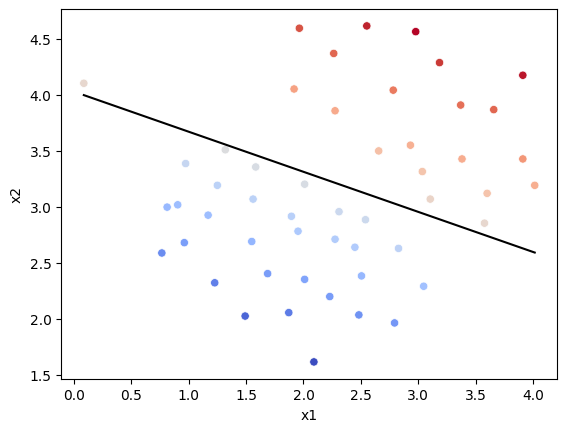

In [ ]:


# pinta los puntos con su nivel de confianza
# añade la recta que es la frontera de separación

In [22]:
a = svc_1.coef_[0][0]
b = svc_1.coef_[0][1]
c = svc_1.intercept_
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

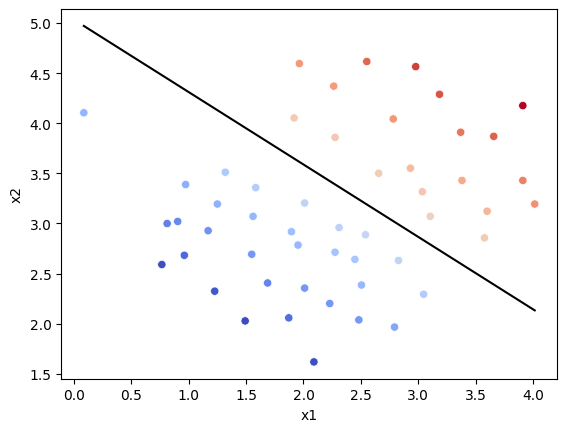

In [ ]:
# equivalente con el modelo 1

Now we're going to move from a linear SVM to one that's capable of non-linear classification using kernels.  We're first tasked with implementing a gaussian kernel function.  Although scikit-learn has a gaussian kernel built in, for transparency we'll implement one from scratch.

## Exercise 2

That result matches the expected value from the exercise.  Next we're going to examine another data set, this time with a non-linear decision boundary.

#### 1. Load the data `ejer_1_data2.mat`

In [38]:
mat2 = sio.loadmat(r'C:\Users\joseb\Documents\the_bridge\ONLINE_DS_THEBRIDGE_jbenegasb\modulo_1\2509_dsft_thebridge\3-Machine Learning\1-Supervisado\3-RegorClass\8-SVM\ejercicios\data\ejer_1_data2.mat')
mat2.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [ ]:
# descarga los datos y mira sus claves

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

#### 2. Create a DataFrame with the features and target

In [39]:
X2 = mat2['X']
y2 = mat2['y'].ravel()

df2 = pd.DataFrame(data = X2, columns = ['x1', 'x2'])
df2['y'] = y2

df2.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [40]:
df2.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


In [41]:
df2.describe()

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


In [ ]:
# crea el df
# muestra su head

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


In [ ]:
# la info del df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 863 entries, 0 to 862
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      863 non-null    float64
 1   x2      863 non-null    float64
 2   y       863 non-null    uint8  
dtypes: float64(2), uint8(1)
memory usage: 14.5 KB


In [ ]:
# describe del df

,x1,x2,y
count,863.000000,863.000000,863.000000
mean,0.503414,0.694304,0.556199
std,0.254967,0.158884,0.497120
min,0.044931,0.402632,0.000000
25%,0.292627,0.557018,0.000000
50%,0.512673,0.693713,1.000000
75%,0.699309,0.830409,1.000000
max,0.998848,0.988596,1.000000


#### 3. Plot a scatterplot with the data

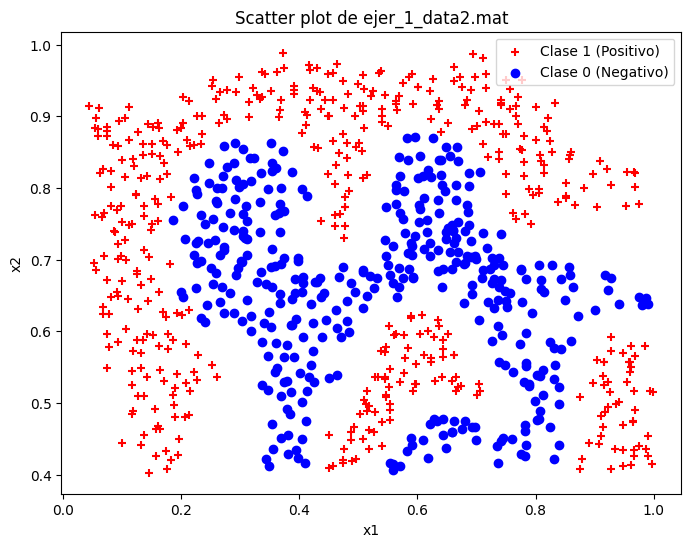

In [42]:
positive2 = df2[df2['y'] == 1]
negative2 = df2[ df2['y'] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(positive2['x1'], positive2['x2'], c='r', marker='+', label='Clase 1 (Positivo)')
plt.scatter(negative2['x1'], negative2['x2'], c='b', marker='o', label='Clase 0 (Negativo)')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper right')
plt.title('Scatter plot de ejer_1_data2.mat')
plt.show()

<Axes: xlabel='x1', ylabel='x2'>

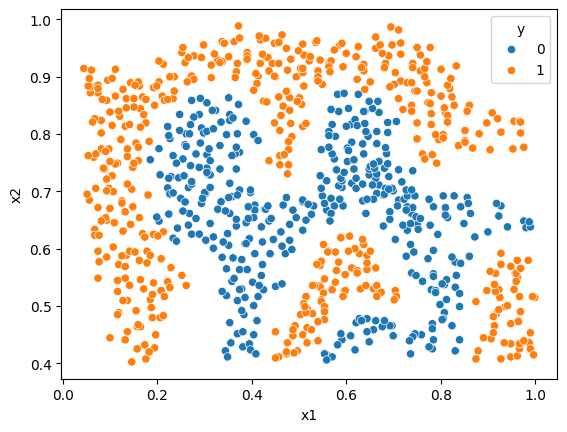

In [ ]:
'''
Vemos que claramente no son linealmente separables. No podemos trazar una unica recta
pra separar los puntos rojos de los azules.
'''

For this data set we'll build a support vector machine classifier using the built-in RBF kernel and examine its accuracy on the training data.  To visualize the decision boundary, this time we'll shade the points based on the predicted probability that the instance has a negative class label.  We'll see from the result that it gets most of them right.

In [43]:
'''
Para manejar datos no lineales, usamos el SVC estandar con un kernel
- kernel = 'rbf': (Radial Basis Function). Es un 'truco' matematico 
(el kernel trick) que mapea los datos a una dimension superior donde si 
son linealmente separables. 
En la practica, nos permite crear fronteras de decision curvas
(como circulos o elipses)
- gamma = 10: controla que tan "local" es la influencia de cada punto. Un gamma 
alto hace que la frontera sea muy ajustada y compleja (posible overfitting)
- c = 100: sigue siendo el parametro de regularizacion, como antes.
- probability = True: Es necesario para poder llamar a predict_proba() mas adelante.
'''

svc_rbf = SVC( C=100, gamma=10, probability=True)

In [44]:
#entrenar y obtener el score
svc_rbf.fit(X2, y2)
svc_rbf.score(X2, y2)

0.9698725376593279

In [45]:
proba_0 = svc_rbf.predict_proba(X2)[:, 0]
proba_0

array([3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 6.16570624e-07,
       5.24837174e-03, 1.60492215e-05, 7.86740724e-08, 9.70684837e-03,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.13556237e-02,
       7.83333712e-12, 3.00000090e-14, 3.00000090e-14, 3.66002011e-10,
       2.40877293e-01, 5.71083789e-01, 3.00000090e-14, 3.00000090e-14,
       1.32821691e-02, 9.26012415e-06, 7.93726801e-03, 1.15819575e-01,
       1.69263637e-02, 1.92158456e-06, 9.57552965e-07, 2.18048108e-07,
       2.80504393e-06, 2.11838658e-02, 1.53602512e-01, 2.60819240e-02,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.03785116e-13, 3.03789254e-10, 3.77751659e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 3.00000090e-14,
       3.00000090e-14, 3.00000090e-14, 3.00000090e-14, 1.32512563e-10,
       7.26248720e-14, 3.00000090e-14, 4.26638694e-09, 1.48517126e-07,
       9.13547055e-06, 8.82698241e-14, 3.00000090e-14, 3.00000090e-14,
      

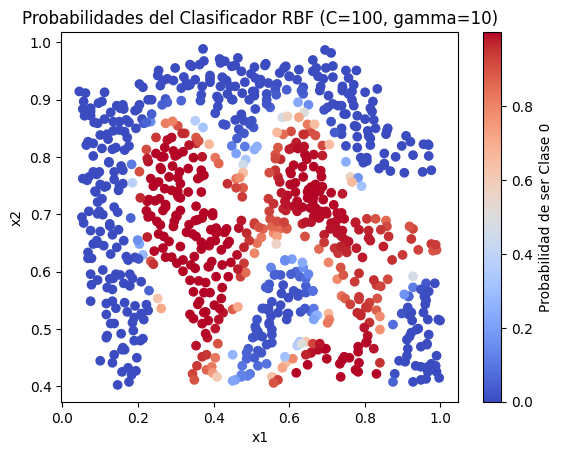

In [ ]:
plt.scatter(df2['x1'], df2['x2'], c=proba_0, cmap='coolwarm')
plt.xlabel('x1')
plt.ylabel('x2')
plt.colorbar(label='Probabilidad de ser Clase 0')
plt.title('Probabilidades del Clasificador RBF (C=100, gamma=10)')
plt.show()




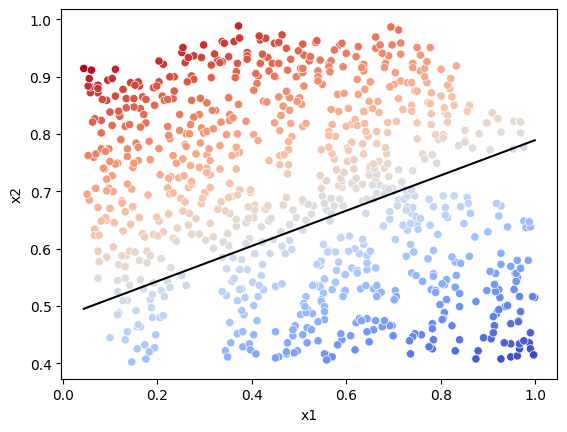

In [ ]:
# haz un svc con C = 1, loss = "hinge" y max_iter = 10000
# entrénalo y calcula su score por defecto



a = svc_3.coef_[0][0]
b = svc_3.coef_[0][1]
c = svc_3.intercept_
x_points = df['x1'].sort_values()
y_points = -a/b * x_points - c/b

# saca el nivel de confianza
# pinta un scatter con ese nivel de confianza y color "coolwarm"
# pinta la frontera de separación de las clases




#### 4. Declare a SVC with this hyperparameters
```Python
SVC(C=100, gamma=10, probability=True)
```


#### 5. Fit the classifier and get the score

0.9698725376593279

#### 6. Plot the scatter plot and probability of predicting 0 with a [sequential color](https://matplotlib.org/3.1.1/tutorials/colors/colormaps.html)

In [ ]:
# pista: tienes que obtener la probabilidad de ser 0

array([[3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       ...,
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00],
       [3.0000009e-14, 1.0000000e+00]], shape=(863, 2))

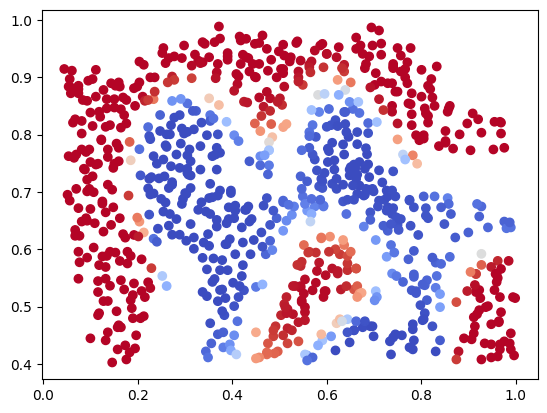

In [ ]:
# haz un scatter para los puntos y pon el color según la probabilidad de ser 1

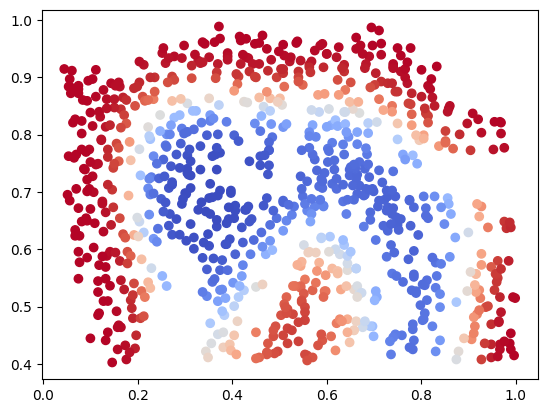

In [ ]:
svc_5 = SVC(C=1, gamma=10, probability=True)
svc_5.fit(X, y)
svc_5.score(X, y)
y_pred_proba = svc_5.predict_proba(X)
plt.scatter(df['x1'], df['x2'], c=y_pred_proba[:,1], cmap="coolwarm")

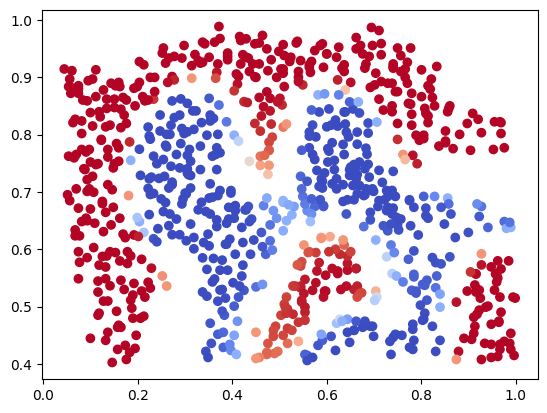

In [ ]:
svc_6 = SVC(C=10000, gamma=10, probability=True)
# equivalente

In [ ]:

# importa train_test_split y GridSearchCV
# divide en train y en test con semilla de 42 y 20% para el test


<Axes: xlabel='x1', ylabel='x2'>

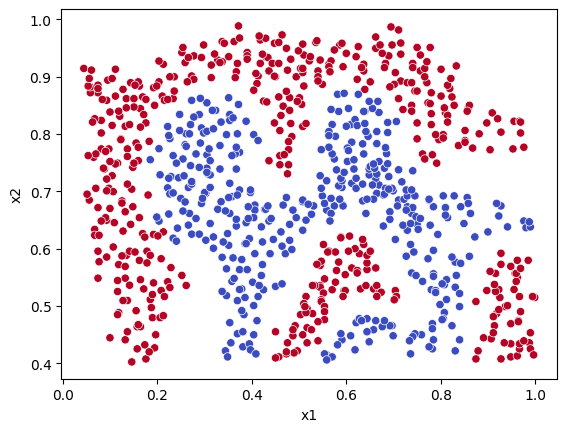

In [ ]:

# haz un scatter con todo X, el color viene de y y el color es "coolwarm"

<Axes: xlabel='x1', ylabel='x2'>

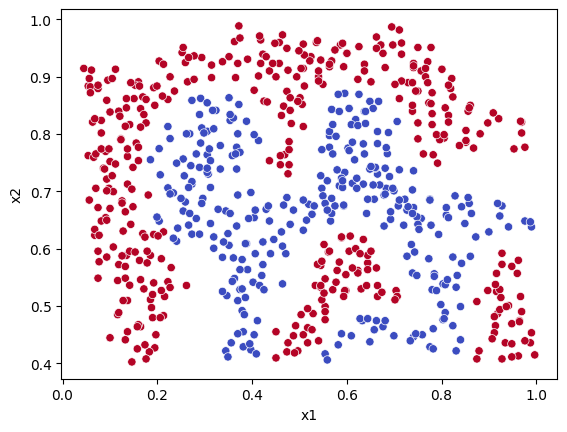

In [ ]:
# equivalente con X train

<Axes: xlabel='x1', ylabel='x2'>

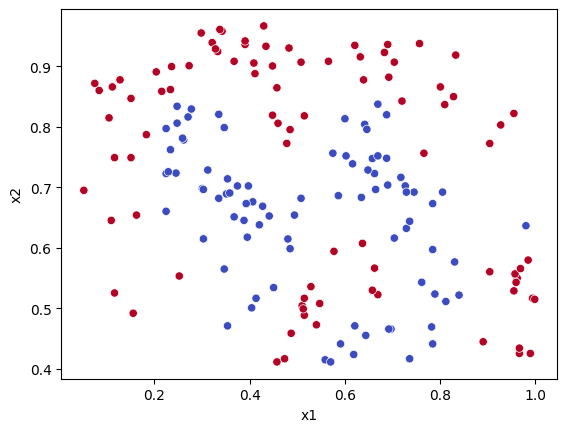

In [ ]:
# equivalente con X test

In [ ]:
# hiperparámetros: kernel rbf, kernel polynomial, C puede valer 1, 10, 50, 100

# haz un gridsearchcv con 5 folds, scoring accuracy y verbose 2, entrénalo con train



print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ....................................C=1, kernel=rbf; total time=   0.0s
[CV] END ...................................C=1, kernel=poly; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.1s
[CV] END ...................................C=1, kernel=poly; total time=   0.2s
[CV] END ...................................C=1, kernel=poly; total time=   0.2s
[CV] END ...................................C=10, kernel=rbf; total time=   0.0s
[CV] END ...................................C=10,

In [ ]:
# mira el score en test

0.9421965317919075

In [ ]:
# usa pickle y guarda el estimador GridsearchCV en un archivo

In [ ]:
# lee usando pickle el archivo

In [45]:
modelo_importado

SVC(C=100, probability=True)

In [ ]:
# predice [1,3] 

c:\Users\Alberto Romero\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1], dtype=uint8)

In [ ]:


# Obtén las probabilidades de ser 1 en test

<Axes: xlabel='x1', ylabel='x2'>

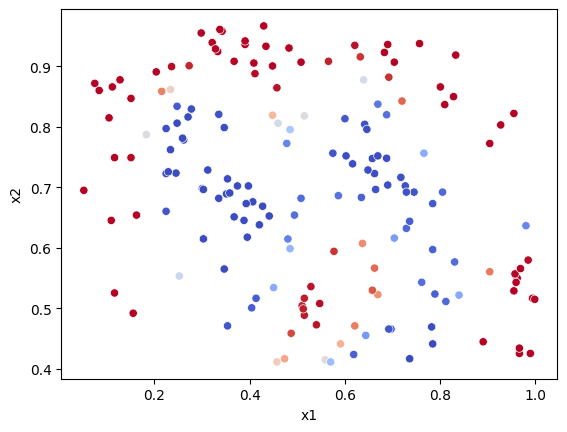

In [ ]:
# haz un scatterplot y pinta esos puntos de test con sus probabilidades de ser 1

In [ ]:
# EXTRA

# usa pipeline y PolynomialFeatures
# prueba grados de 2 a 6
# el hiperparámetro C del svc entre -1 y 2, 5 valor espaciados logarítmicamente
# 5 folds
# scoring accuracy


print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=2; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=3; total time=   0.0s
[CV] END ............classifier__C=0.1, polynomial__degree=4; total time=   0.0s
[CV] END ............classifier__C=0.1, polynom

0.8323699421965318

In [ ]:
# con pipelines y GridSearchCV
# polynomial puede ser grado 2, 3 o Ninguno
# C del svc espaciado logarítmico entre -1 y 2, 5 valores
# el kernel del svc lineal o gaussiano

# 5 folds, scoring accuracy, verbose 2



print(gs.best_estimator_)
print(gs.best_params_)
print(gs.best_score_)

final_model = gs.best_estimator_
final_model.fit(X_train, y_train)
final_model.score(X_test, y_test)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(degree=3); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(degree=3); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, polynomial=PolynomialFeatures(degree=3); total time=   0.0s
[CV] END classifier__C=0.1, classifier__kernel=linear, pol

0.9248554913294798